In [205]:
import numpy as np 
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

eventos = pd.read_csv('events.csv',low_memory=False)

In [206]:
eventos['timestamp'] = pd.to_datetime(eventos['timestamp'])

# Análisis de los canales de acceso 

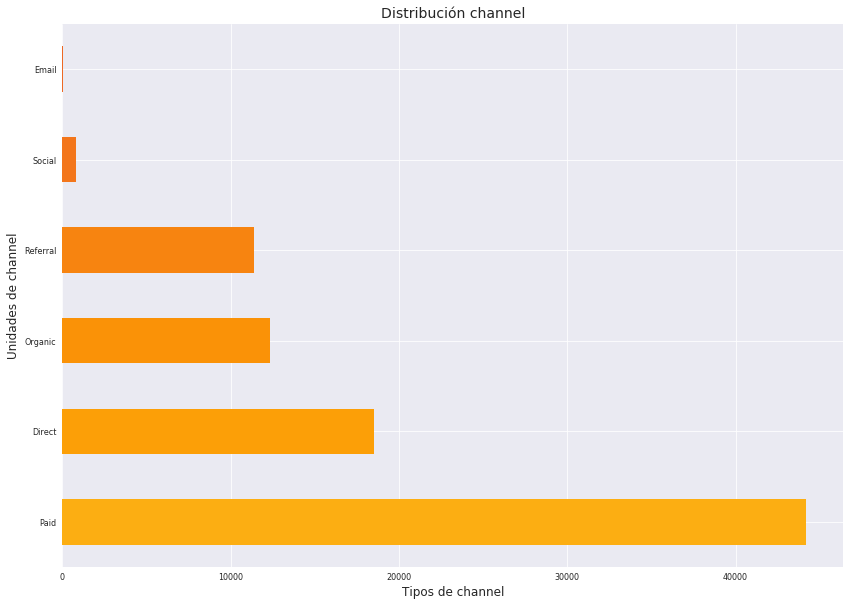

In [207]:
color = cm.inferno_r(np.linspace(.18,.8, 21))

analisisChannel = eventos.loc[:,['timestamp','person','event','channel']]
analisisChannel = analisisChannel.loc[analisisChannel['channel'] != 'Unknown',:]
plot = analisisChannel['channel'].value_counts().plot(kind = 'barh',figsize = (14,10),color=color)
plot.set_title('Distribución channel',fontsize = 14)
plot.set_xlabel('Tipos de channel',fontsize =12)
plot.set_ylabel('Unidades de channel',fontsize =12)
plt.show()

Claramente se ve que el tipo de canal dominante es el pago.

### Evolución en el tiempo

In [156]:
analisisChannel['month'] = analisisChannel['timestamp'].dt.month

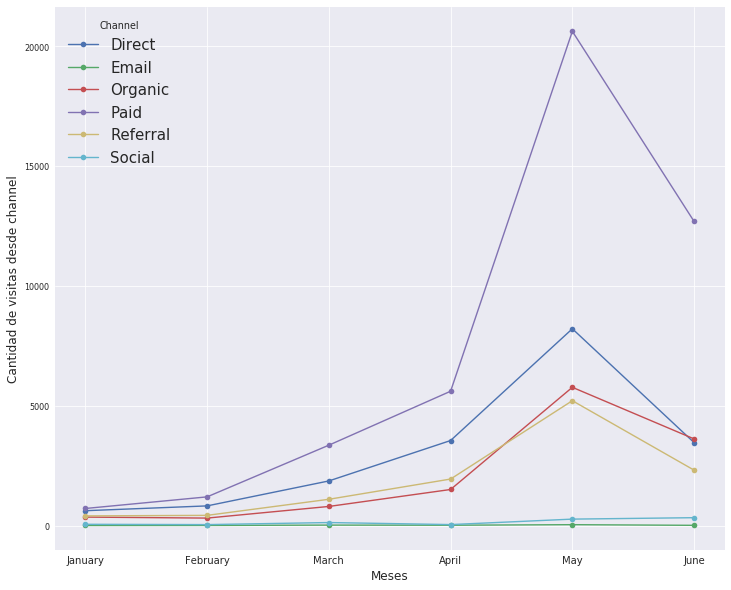

In [157]:
plot = analisisChannel.groupby(['month','channel']).agg(np.size)['event'].unstack(1).plot(kind = 'line',figsize = (12,10),style='-o')
plot.legend(fontsize=15,title='Channel')
plot.set_xticklabels(['','January','February','March','April','May','June'], fontsize = 10)
plot.set_ylabel('Cantidad de visitas desde channel',fontsize = 12)
plot.set_xlabel('Meses',fontsize = 12)
plt.show()

Es claro que el mes de mayo tiene un pico de cantidades de channel que concuerda con el mes de mayor participación dentro del site (anteriormente analizado).

Por su parte, los canales como emails o social tiene prácticamente nula incidencia tanto en cantidad como en distribución durante los 6 meses.

### Channels y usuarios 

In [230]:
a = analisisChannel.groupby(['person','channel']).agg(np.size)
a = a.loc[a['event'] > 85]


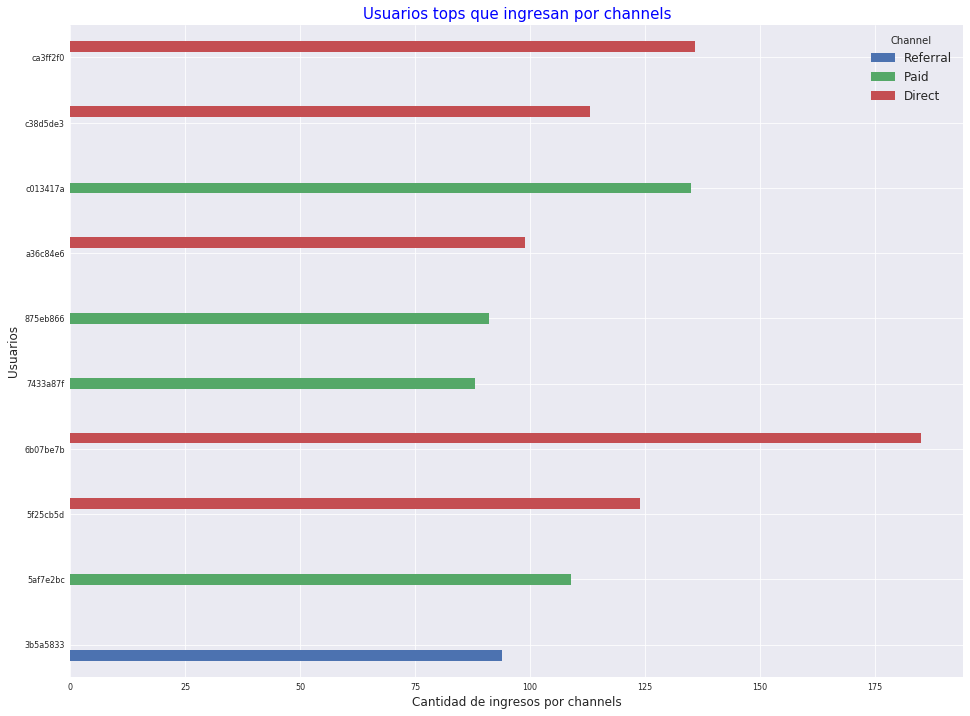

In [229]:
plot = a['event'].unstack(1).plot(kind = 'barh',figsize = (16,12),stacked=False)

plot.set_title('Usuarios tops que ingresan por channels', fontsize=15,color = 'blue')
plot.set_xlabel('Cantidad de ingresos por channels',fontsize=12)
plot.set_ylabel('Usuarios',fontsize=12)
plot.legend(title = 'Channel',fontsize = 12)
plt.show()

Se puede observar que entre los primeros díez usuarios no hay ninguno que utilice dos canales diferentes y superen la cota de 85 veces, por lo cuál se deduce que los usuarios tops ingresan solamente por una manera después de acumular 85 ingresos channels.

Otra observación es que el directo y pago dentro de los usuarios top es la preferencia por excelencia.